# EMATM0048 SDPA Coursework Part2

In [1]:
#!pip install requests
!rm data/*.csv

In [2]:
import json
import requests
import pandas as pd
import datetime
import time

In [8]:
start_date = "2022-12-10"
end_date = "2022-12-20"

## Step 1: Crawl OHLC dataset from Bitstamp

Data is come from Bitstamp, and the variables is Cryptocurrencies' prices.

1. Transform time to Unixstamp
2. Crawl every 12 hours data to require limit
3. Make a loop of step 2
4. Merge data from step 3
5. Transform to Dataframe and save to data/{currency_pair}.csv

In [3]:
def gen_timestamp(start, end):
    """Generate Unix timestamp"""
    dates = pd.date_range(start, end, freq = "12H")
    dates = [ int(time.mktime(time.strptime(str(date), "%Y-%m-%d %H:%M:%S"))) for date in list(dates)]
    return dates

def get_data(currency_pair, start, end):
    """Get OHLC data from Bitstamp"""

    url = f"https://www.bitstamp.net/api/v2/ohlc/{currency_pair}/"
    start_time = start
    
    dates = gen_timestamp(start, end)

    ohlc_data = []

    for start, end in zip(dates, dates[1:]):

        params = {
                "start":start,
                "end":end,
                "step":60,
                "limit":1000,
                }

        data = requests.get(url, params = params)
        data = data.json()["data"]["ohlc"]

        ohlc_data += data
    
    df = pd.DataFrame(ohlc_data)
    
    df.to_csv(f'data/{currency_pair}.csv', index=False)
    return df

In [26]:
get_data('btcusd', start_date, end_date)
get_data('ethusd', start_date, end_date)
get_data('btceur', start_date, end_date)

,close,high,low,open,timestamp,volume
0,16262,16262,16260,16260,1670613660,0.02074566
1,16261,16263,16259,16263,1670613720,0.02162900
2,16261,16261,16261,16261,1670613780,0.00000000
3,16261,16263,16259,16263,1670613840,0.10505137
4,16260,16262,16260,16261,1670613900,0.02789437
...,...,...,...,...,...,...
19995,15470,15473,15469,15473,1671494160,0.17791564
19996,15471,15473,15471,15472,1671494220,0.01420000
19997,15484,15484,15471,15471,1671494280,0.01326399
19998,15486,15486,15486,15486,1671494340,0.00172000


## Step 2: Data preparation & cleaing

1. Read data from csv
2. Sort by timestamp
3. Delete outlier date
4. Re-index

In [16]:
def cleaning(df, dates):
    
    # sort by date
    df["timestamp"] = df["timestamp"].astype(int)
    df = df.sort_values(by="timestamp")
    
    # delete outside date
    df = df[ df["timestamp"] >= dates[0] ]
    df = df[ df["timestamp"] < dates[-1] ]
    
    # re-index
    df.index = range(len(df))
    
    return df

In [27]:
dates = gen_timestamp(start_date, end_date)

btcusd = pd.read_csv('data/btcusd.csv')
btcusd = cleaning(btcusd, dates)

ethusd = pd.read_csv('data/ethusd.csv')
ethusd = cleaning(ethusd, dates)

btceur = pd.read_csv('data/btceur.csv')
btceur = cleaning(btcusd, dates)

## Step 3: Perform exploratory analysis

1. Compute the mean, sum, range
2. Ploting the closing price trend

In [18]:
btcusd.describe()

,close,high,low,open,timestamp,volume
count,19720.000000,19720.000000,19720.000000,19720.000000,1.972000e+04,19720.000000
mean,17150.417748,17152.408519,17148.373935,17150.438996,1.671060e+09,1.375630
std,397.120788,397.936543,396.406117,397.112070,2.460750e+05,4.747488
min,16324.000000,16375.000000,16293.000000,16322.000000,1.670630e+09,0.000000
25%,16757.000000,16758.000000,16756.000000,16756.000000,1.670844e+09,0.033120
50%,17145.000000,17146.000000,17145.000000,17146.000000,1.671058e+09,0.254430
75%,17416.000000,17418.000000,17413.000000,17416.000000,1.671272e+09,1.167737
max,18346.000000,18373.000000,18330.000000,18347.000000,1.671494e+09,335.434647


In [22]:
ethusd.describe()

,close,high,low,open,timestamp,volume
count,19720.000000,19720.000000,19720.000000,19720.000000,1.972000e+04,19720.000000
mean,1246.791055,1246.958382,1246.623925,1246.798915,1.671060e+09,5.497704
std,50.715310,50.716469,50.715590,50.707609,2.460750e+05,33.037249
min,1154.000000,1156.000000,1150.600000,1154.300000,1.670630e+09,0.000000
25%,1186.300000,1186.400000,1186.200000,1186.300000,1.670844e+09,0.045500
50%,1265.300000,1265.400000,1265.300000,1265.400000,1.671058e+09,0.449135
75%,1275.600000,1275.700000,1275.400000,1275.600000,1.671272e+09,2.761845
max,1348.000000,1352.200000,1346.800000,1348.100000,1.671494e+09,3005.037948


In [28]:
btceur.describe()

,close,high,low,open,timestamp,volume
count,19720.000000,19720.000000,19720.000000,19720.000000,1.972000e+04,19720.000000
mean,17150.417748,17152.408519,17148.373935,17150.438996,1.671060e+09,1.375630
std,397.120788,397.936543,396.406117,397.112070,2.460750e+05,4.747488
min,16324.000000,16375.000000,16293.000000,16322.000000,1.670630e+09,0.000000
25%,16757.000000,16758.000000,16756.000000,16756.000000,1.670844e+09,0.033120
50%,17145.000000,17146.000000,17145.000000,17146.000000,1.671058e+09,0.254430
75%,17416.000000,17418.000000,17413.000000,17416.000000,1.671272e+09,1.167737
max,18346.000000,18373.000000,18330.000000,18347.000000,1.671494e+09,335.434647


<AxesSubplot: >

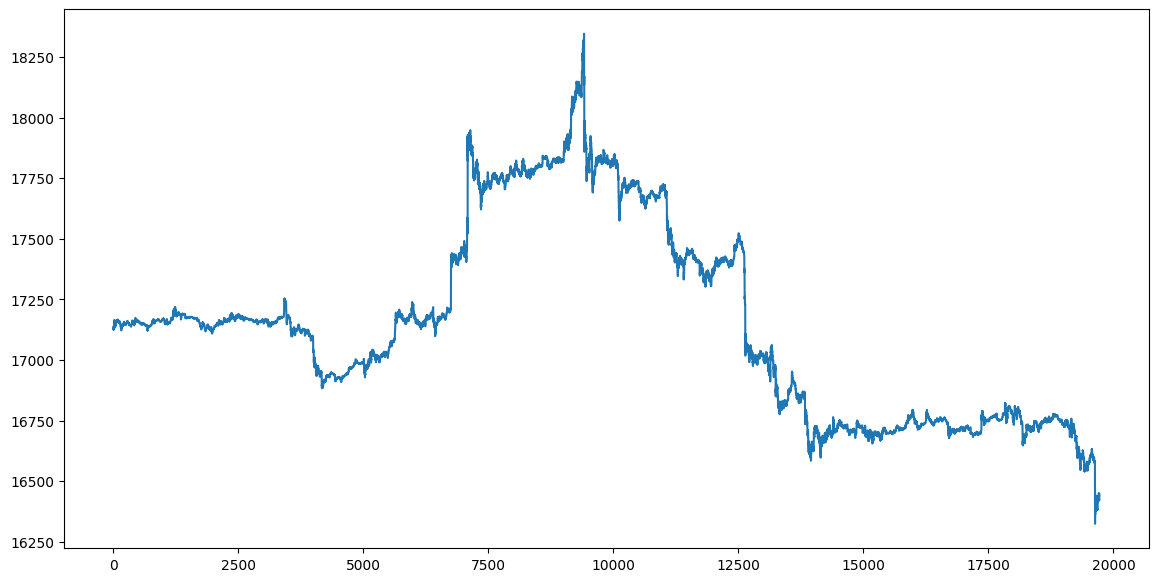

In [24]:
btcusd['close'].plot(figsize=(14,7))

<AxesSubplot: >

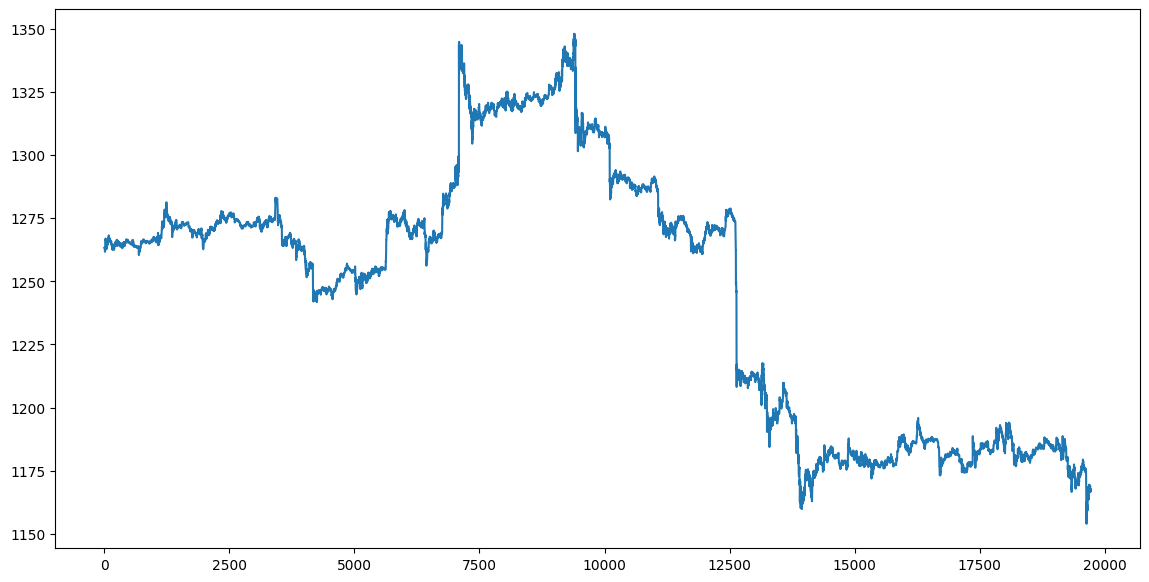

In [25]:
ethusd['close'].plot(figsize=(14,7))

<AxesSubplot: >

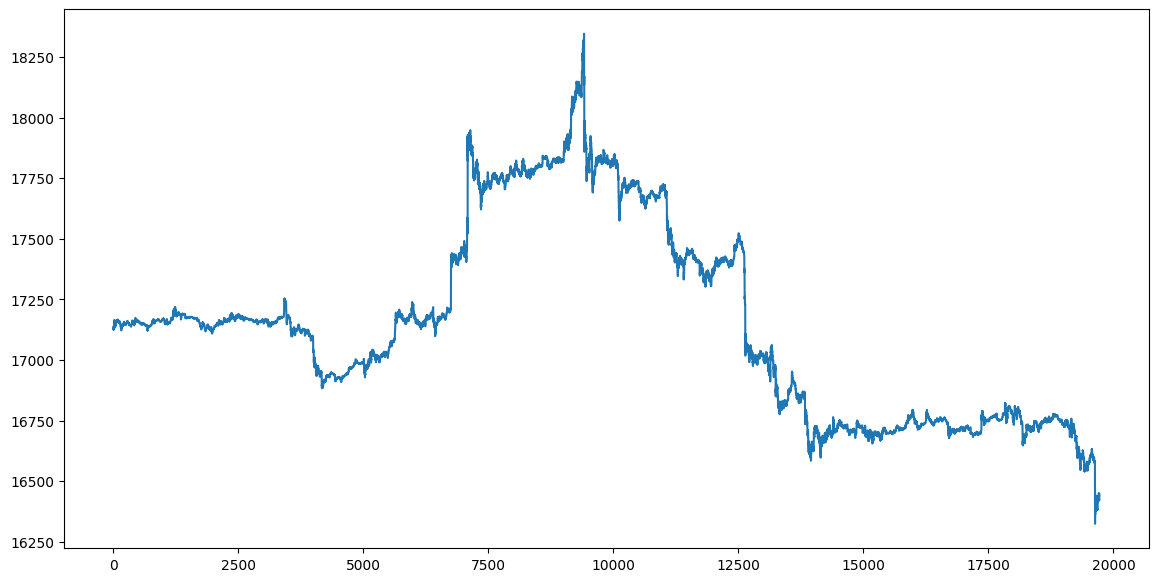

In [29]:
btcusd['close'].plot(figsize=(14,7))

## Step 4: Ask questions about dataset

1. Does btcusd, ethusd, btceur have similar ratios in their different price ranges?
2. Does btcusd, ethusd, btceur have similar trend?
3. Does ethusd fall when btcusd falls sharply and is it smoother?

In [ ]:
def compute_return(begin: int):

    d1 = list()
    d2 = list()

    d1.append((SZ[begin, 1]/SZ[begin-1, 0] - 1)*100)
    d2.append((ZZ[begin, 1]/ZZ[begin-1, 0] - 1)*100)

    for i in range(0, 240):
        d1.append((SZ[begin+i, 0]/SZ[begin-1, 0] - 1)*100)
        d2.append((ZZ[begin+i, 0]/ZZ[begin-1, 0] - 1)*100)

    return np.array(d1), np.array(d2)


In [35]:
# 生成大波段

def kkey(key1, key2):
    key = list()
    for index in range(1, len(key1)):
        for i in range(30):
            if key1[index]-i <= key1[index-1]:
                break
            elif key1[index]-i in key2:
                if len(key) == 0:
                    key = key + [[0, key1[index]], [key1[index]]]
                    break
                else:
                    key[-1].append(key1[index])
                    key.append([key1[index]-i])
                    break
            elif key1[index]+i >= key1[-1]:
                break
            elif key1[index]+i in key2:
                if len(key) == 0:
                    key = key + [[0, key1[index]+i], [key1[index]+i]]
                    break
                else:
                    key[-1].append(key1[index]+i)
                    key.append([key1[index]+i])
                    break

    return key

## Step 5: Summarise

In this project, the first step was to obtain the open price etc. of the three cryptocurrencies via the Bitstamp api, and to pre-process and clean the data.

I believe that the same cryptocurrency price movements between different trading institutions can be analysed in a subsequent study. When analysing the data, the price trends can be summarised in several line segments to improve the overall readability.